In [1]:
# To predict future expenditures of Indian Military

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dataset = pd.read_csv('Military Expenditure.csv')

In [4]:
yin=dataset[dataset['Name']=='India'].drop(['Name','Code','Type','Indicator Name'],axis=1)
X_df=pd.DataFrame(yin.columns,dtype=int)
y=np.array(yin).reshape(len(yin.columns)) # y 1D

In [5]:
X_df.shape,y.shape

((59, 1), (59,))

In [6]:
X_df.head()

,0
0,1960
1,1961
2,1962
3,1963
4,1964


In [7]:
y

array([6.81765682e+08, 7.48388248e+08, 1.06543606e+09, 1.79544930e+09,
       1.98665449e+09, 2.12598963e+09, 1.66115491e+09, 1.48773333e+09,
       1.58686667e+09, 1.69143333e+09, 1.83296667e+09, 2.25525698e+09,
       2.49724471e+09, 2.52992105e+09, 2.89541572e+09, 3.32364680e+09,
       3.29491061e+09, 3.47708094e+09, 3.97581913e+09, 4.58973835e+09,
       5.42080952e+09, 5.87900704e+09, 6.30210796e+09, 6.83076870e+09,
       6.95668245e+09, 7.56702402e+09, 9.53936309e+09, 1.08774062e+10,
       1.13464192e+10, 1.05897969e+10, 1.05370354e+10, 8.62247388e+09,
       8.08323141e+09, 8.25354258e+09, 8.88055123e+09, 9.75446463e+09,
       9.90467274e+09, 1.14648834e+10, 1.19206108e+10, 1.38955625e+10,
       1.42875142e+10, 1.46006423e+10, 1.47496673e+10, 1.63339866e+10,
       2.02385665e+10, 2.30723129e+10, 2.39519280e+10, 2.82547734e+10,
       3.30023767e+10, 3.87221544e+10, 4.60904457e+10, 4.96338158e+10,
       4.72169200e+10, 4.74035288e+10, 5.09141083e+10, 5.12954838e+10,
      

In [8]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       59 non-null     int32
dtypes: int32(1)
memory usage: 364.0 bytes


In [9]:
X_df.describe()

,0
count,59.000000
mean,1989.000000
std,17.175564
min,1960.000000
25%,1974.500000
50%,1989.000000
75%,2003.500000
max,2018.000000


In [10]:
X_df.isna().sum()

0    0
dtype: int64

In [11]:
X_df.duplicated().sum()

0

In [12]:
X=X_df.iloc[:,0:1] # for plt and fit_transform parsing

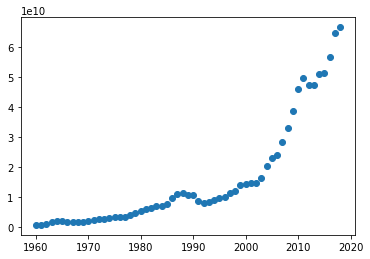

In [13]:
plt.scatter(X,y) # plt.scatter needs 1D data any of (1,10) 2D or (10,1) or (10) size

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Training

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# pipeline

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
pipe = Pipeline([
#     ('sc',StandardScaler()),
    ('poly_reg',PolynomialFeatures()),
    ('regressor',LinearRegression())
])

In [18]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('poly_reg', PolynomialFeatures()),
                ('regressor', LinearRegression())])

In [19]:
pipe.named_steps

{'poly_reg': PolynomialFeatures(), 'regressor': LinearRegression()}

In [20]:
y_pred=pipe.predict(X_test)

# metrics

In [21]:
from sklearn import metrics

In [22]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4351863535.908593
2.3505688464651702e+19
4848266542.24494


In [23]:
r2=metrics.r2_score(y_test,y_pred)
r2

0.8866166780072327

In [24]:
def r2_adj(r2,n,k):
    return 1-(((1-r2)*(n-1))/(n-1-k))

In [25]:
n,k=X_test.shape
r2_adj(r2,n,k)

0.8752783458079559

# CV

In [26]:
from sklearn.model_selection import cross_val_score
r2_cv=np.mean(cross_val_score(pipe, X_train, y_train, cv=5,scoring='r2'))
r2_cv

0.8291811450480214

In [27]:
n,k=X_train.shape
r2_adj(r2_cv,n,k)

0.825385170493533

# vis

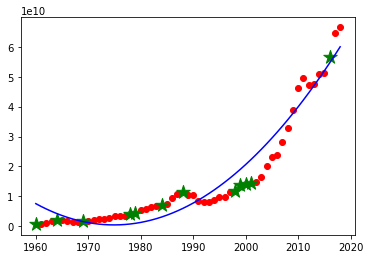

In [28]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green',marker='*',s=200)
plt.plot(X.iloc[:,0], 
            pipe.predict(X), color = 'blue')

# hyperparameter tuning

In [29]:
# from sklearn.model_selection import GridSearchCV
# param={'poly_reg__degree':[1,2,5,7,10,15,25,40,50]}
# gs_cv=GridSearchCV(pipe,param,scoring='neg_mean_squared_error',cv=5)

In [30]:
# gs_cv.fit(X_train,y_train)

In [31]:
# gs_cv.best_params_
# list(gs_cv.best_params_.values())[0]

In [32]:
# gs_cv.best_score_

# find optimum degree

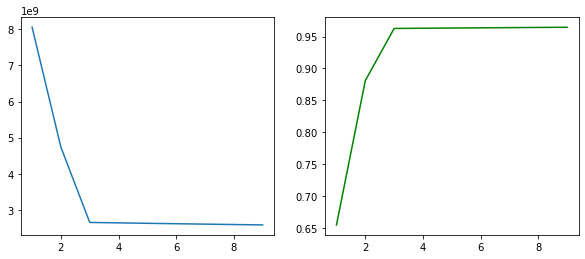

In [33]:
def find_optimum_degree(X,y,degrees):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    r2s=[]
    rmses = []
    
    for deg in degrees:
    
        # Train features
        poly_features = PolynomialFeatures(degree=deg)
        x_poly_train = poly_features.fit_transform(X_train)
        x_poly_test = poly_features.transform(X_test)
        # Linear regression
        poly_reg = LinearRegression()
        poly_reg.fit(x_poly_train, y_train)

        # Compare with test data

        poly_predict = poly_reg.predict(x_poly_test)
        poly_mse = metrics.mean_squared_error(y_test, poly_predict)
        poly_r2=metrics.r2_score(y_test, poly_predict)
        poly_rmse = np.sqrt(poly_mse)
        rmses.append(poly_rmse)
        r2s.append(poly_r2)
    return degrees,rmses,r2s

degrees,rmses,r2s=find_optimum_degree(X,y,np.arange(1,10))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(degrees,rmses)
plt.subplot(122)
plt.plot(degrees,r2s,c='green')

# train with tuned hyperparameter

In [34]:
pipe_2 = Pipeline([
#     ('sc',StandardScaler()),
    ('poly_reg',PolynomialFeatures(degree=3)),
    ('regressor',LinearRegression())
])

In [35]:
pipe_2.fit(X_train,y_train)

Pipeline(steps=[('poly_reg', PolynomialFeatures(degree=3)),
                ('regressor', LinearRegression())])

In [36]:
pipe_2.steps

[('poly_reg', PolynomialFeatures(degree=3)), ('regressor', LinearRegression())]

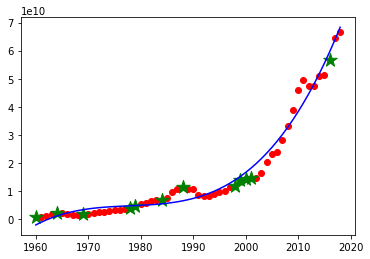

In [37]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green',marker='*',s=200)
plt.plot(X.iloc[:,0], 
            pipe_2.predict(X), color = 'blue')

# Attributes

In [38]:
# print(pipe_2[1].coef_)
# print(pipe_2[1].intercept_)

In [39]:
print(pipe_2[0].n_input_features_)
print(pipe_2[0].n_output_features_)
print(pipe_2[0].powers_)

1
4
[[0]
 [1]
 [2]
 [3]]


# future predictions

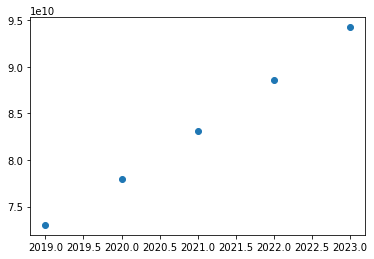

In [40]:
xt=np.arange(2019,2024)
xt=xt.reshape(len(xt),1)
yt=pipe_2.predict(xt)
plt.scatter(xt,yt)

In [41]:
import joblib
joblib.dump(pipe_2,'mil_exp_PLR.pkl')
# joblib.load('filename')

['mil_exp_PLR.pkl']

In [42]:
metrics.r2_score(y_test,y_pred)

0.8866166780072327

# Learning & validation curve

In [43]:
import yellowbrick.model_selection.learning_curve as yb_lc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

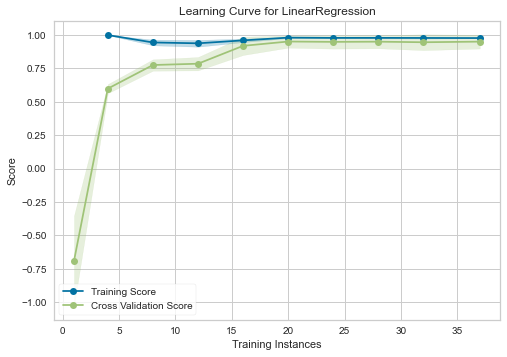

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>,
              cv=5,
              estimator=Pipeline(steps=[('poly_reg',
                                         PolynomialFeatures(degree=3)),
                                        ('regressor', LinearRegression())]),
              scoring='r2',
              train_sizes=array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]))

In [44]:
yb_lc(pipe_2, X_train, y_train, cv=5, scoring='r2',
      train_sizes=np.linspace(0.01,1,10))

In [45]:
from yellowbrick.model_selection import validation_curve

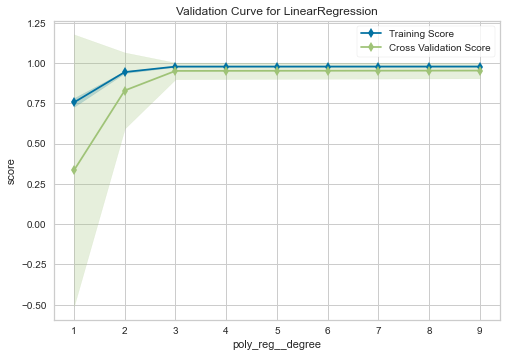

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for LinearRegression'}, xlabel='poly_reg__degree', ylabel='score'>,
                cv=5,
                estimator=Pipeline(steps=[('poly_reg',
                                           PolynomialFeatures(degree=3)),
                                          ('regressor', LinearRegression())]),
                n_jobs=-1, param_name='poly_reg__degree',
                param_range=array([1, 2, 3, 4, 5, 6, 7, 8, 9]), scoring='r2')


In [46]:
print(validation_curve(pipe_2, X_train, y_train, param_name="poly_reg__degree", n_jobs=-1,
      param_range=np.arange(1, 10), cv=5, scoring="r2"))